# 1. 

In [2]:
#1
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())
print(iris.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
#2
print("Species별 Petal Length의 평균, 표준편차, 최소값, 최대값, 사분위수 : ")
print(iris.groupby('species')['petal_length'].describe())
print("그룹별 데이터 개수 : ")
print(iris.groupby('species').count())

Species별 Petal Length의 평균, 표준편차, 최소값, 최대값, 사분위수 : 
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9
그룹별 데이터 개수 : 
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa                50           50            50           50
versicolor            50           50            50           50
virginica             50           50            50           50


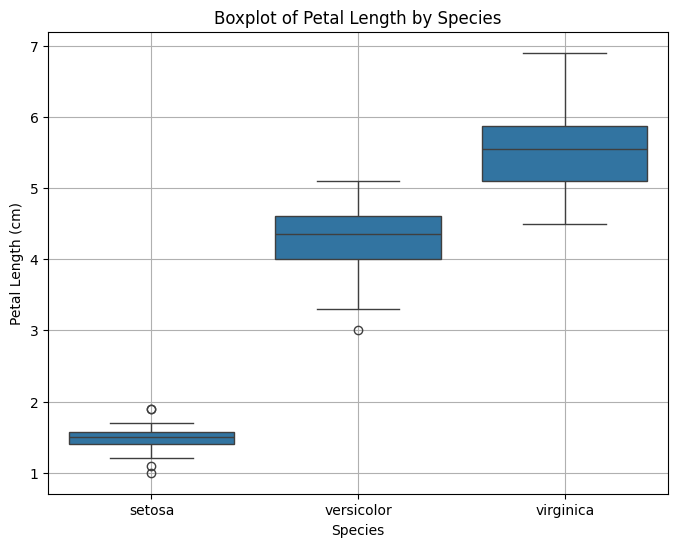

In [4]:
# 3
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Boxplot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

# virginica 평균값 중앙값 높음
# setosa 평균값 중앙값 낮음 

In [6]:
# 4
import scipy

for species in iris['species'].unique():
    data = iris[iris['species'] == species]['petal_length']
    stat, p = scipy.stats.shapiro(data)
    print(f"{species.capitalize():<10} W-statistic: {stat}, p-value: {p}")

# 모두 유의수준 0.05 에서 귀무가설 채택. 

Setosa     W-statistic: 0.9549767850318988, p-value: 0.0548114671955363
Versicolor W-statistic: 0.96600440254332, p-value: 0.15847783815657573
Virginica  W-statistic: 0.9621864428612802, p-value: 0.10977536903223506


In [7]:
# 5
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

stat, p = scipy.stats.levene(setosa, versicolor, virginica)
print(f"W-statistic: {stat}, p-value: {p}")

# 유의수준 0.05에서 귀무가설 기각, 등분산성 만족하지 않음

W-statistic: 19.480338801923573, p-value: 3.1287566394085344e-08


	# 6 
	•	귀무가설 (H₀): 세 그룹의 분산이 모두 같다 (등분산성 만족)
	•	대립가설 (H₁): 세 그룹의 분산 중 적어도 하나 이상 다르다

In [8]:
# 7
f_stat, p_value = scipy.stats.f_oneway(setosa, versicolor, virginica)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

# 종 간 petal_length의 평균에는 유의미한 차이가 있다. 

ANOVA F-statistic: 1180.161182252981, p-value: 2.8567766109615584e-91


In [10]:
# 8
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=iris['petal_length'],
                          groups=iris['species'],
                          alpha=0.05)
print(tukey)

# 세종 사이에 유의미한 차이가 존재하고, 세 그룹 모두 유의수준 0.05에서 유의미한 차이를 보인다. 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


# 9

- boxplot과 anova에서 세 종 간의 petal_length 평균에는 유의미한 차이가 있음을 확인할 수 있다
- Tukey HSD로 사후 검정 한 결과 모든 3쌍에서 유의미한 차이를 확인 할 수 있다. 
- Virginica가 가장 길고, Setosa가 가장 짧으며, Versicolor는 중간임을 확인할 수 있다.

# 2. 

In [11]:
#1

import pandas as pd

df = pd.read_csv('creditcard.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df['Class'].value_counts()) 
print(df['Class'].value_counts(normalize=True)) 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# 2 
fraud = df[df['Class'] == 1]
normal_sample = df[df['Class'] == 0].sample(n=10000, random_state=42)
sampled_df = pd.concat([fraud, normal_sample], axis=0)
print(sampled_df['Class'].value_counts(normalize=True))

Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64


In [14]:
# 3
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sampled_df['Amount_Scaled'] = scaler.fit_transform(sampled_df[['Amount']])
sampled_df = sampled_df.drop('Amount', axis=1)

X = sampled_df.drop('Class', axis=1)
y = sampled_df['Class'] 

In [ ]:
# 4
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("학습셋 Class 분포:", y_train.value_counts())
print("\n테스트셋 Class 분포:", y_test.value_counts())

학습셋 Class 분포: Class
0    7999
1     394
Name: count, dtype: int64

테스트셋 Class 분포: Class
0    2001
1      98
Name: count, dtype: int64


In [ ]:
# 5
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 적용 전/후 Class 분포 비교
print("SMOTE 적용 전:\n", y_train.value_counts())
print("\nSMOTE 적용 후:\n", y_train_smote.value_counts())

SMOTE 적용 전:
 Class
0    7999
1     394
Name: count, dtype: int64

SMOTE 적용 후:
 Class
0    7999
1    7999
Name: count, dtype: int64


/Users/jimin/anaconda3/envs/hw3/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [26]:
# 6
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score

model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] 

y_pred = (y_proba > 0.8).astype(int)
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# PR-AUC
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC (average_precision_score): {pr_auc}")

Classification Report:
              precision    recall  f1-score   support

           0     0.9945    0.9965    0.9955      2001
           1     0.9255    0.8878    0.9062        98

    accuracy                         0.9914      2099
   macro avg     0.9600    0.9421    0.9509      2099
weighted avg     0.9913    0.9914    0.9913      2099

PR-AUC (average_precision_score): 0.9546511280244321
